In [88]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.animation as animation

import imageio

import datetime


In [112]:
# C:\Users\cruze\Documents\GitHub\covid19\csse_covid_19_data\csse_covid_19_time_series

# confirmed_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_US.csv')
confirmed_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
confDF = pd.read_csv(confirmed_URL)

# global_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_global.csv')
global_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
globalDF = pd.read_csv(global_URL)

# death_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_deaths_US.csv')
deathsUS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
deathDF = pd.read_csv(deathsUS_URL)

deathsGlobal_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deathGlobalDF = pd.read_csv(deathsGlobal_URL)
# dateDict = dict(zip(confDF.columns[11:], pd.to_datetime(confDF.columns[11:])))
# confDF = confDF.rename(dateDict, axis='columns')

popPath = os.path.join(os.getcwd(), 'USpopulation.csv')
popDF = pd.read_csv(popPath)

In [123]:
byStateDF = confDF.groupby('Province_State').sum()

states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']

byStateDF = byStateDF.loc[states]

deathStateDF = deathDF.groupby('Province_State').sum()

deathStateDF = deathStateDF.loc[states]

population = confDF.set_index('Combined_Key').join(popDF.set_index('NAME')).iloc[:,-1]

In [91]:
# byStateDF[byStateDF < 1] = 1

dfData = byStateDF.iloc[:, 5:]

#add South Korea and Italy
temp = globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,5:]
temp = temp.append(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,5:])
temp = temp.append(globalDF[globalDF.index==223].iloc[:,5:])
temp = temp.rename(index={143 : 'South Korea', 137 : 'Italy', 223 : 'United Kingdom'})
dfData = dfData.append(temp)


dfLabels = byStateDF.iloc[:, :5]
labels = dfLabels.index.tolist()
labels.append('South Korea')
labels.append('Italy')
labels.append('United Kingdom')

dfDiff = dfData.diff(axis=1).iloc[:,1:]
dfData = dfData.iloc[:,1:]

dfDiff = dfDiff.transpose().rolling(window=3).mean().transpose()

plt_path = os.path.join(os.getcwd(), 'plots')

dfData[dfData < 1] = 1
dfDiff[dfDiff < 1] = 1

# dfDiff.to_csv('diff.csv')
# dfData.to_csv('state.csv')


for j in range(0,int(len(dfData.columns))):

    plotname = 'plot' + str(j).zfill(4) + '.png'
    plot_path = os.path.join(os.getcwd(), 'plots', plotname)
    

    plt.figure(figsize=(22, 10))
    plt.plot(dfData.iloc[:,:j].transpose(), dfDiff.iloc[:,:j].transpose(), alpha=0.2)

    for i, lab in enumerate(labels):
        x = dfData.iloc[i,j-1]
        y = dfDiff.iloc[i,j-1]
        plt.scatter(x, y, marker='o', color='red')
        plt.text(x+0.5, y+0.5, lab, fontsize=11)

    plt.title('Confirmed Cases on ' + dfData.iloc[:,j].name + ' vs. Total Cases ')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Total Cases')
    plt.ylabel('New Daily Cases')
    plt.xlim(1, 1000000)
    plt.ylim(1, 100000)
    plt.xticks(rotation='vertical')

    plt.savefig(plot_path)
    plt.clf()
    plt.close()
    # plt.show()



img_path = os.path.join(os.getcwd(), 'plots')
filenames = os.listdir(img_path)
save_path = os.path.join(os.getcwd(), 'animated.gif')

print('reading files...')

d = "plots"
filenames = []
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        filenames.append(full_path)

print('saving gif...')

filenames = filenames[-30:]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(save_path, images, duration=1)

------------------------------------------------------------------------

below this line in progress

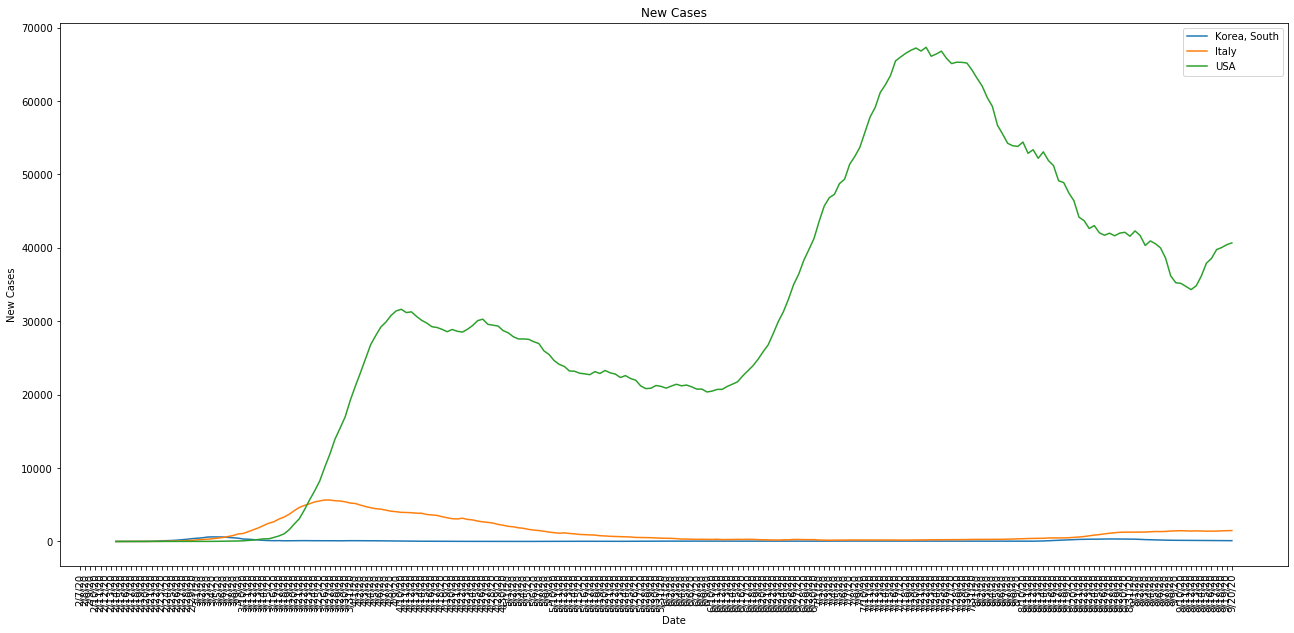

In [92]:

plt.figure(figsize=(22, 10))

# plt.plot(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose())

plt.plot(globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Korea, South')
plt.plot(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Italy')
plt.plot(globalDF[globalDF['Country/Region']=='US'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='USA')
# plt.plot(globalDF[globalDF['Country/Region']=='Taiwan'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Italy')
# plt.plot(globalDF[globalDF['Country/Region']=='Canada'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Italy')


# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='California')
# plt.plot(byStateDF[byStateDF.index=='New York'].iloc[:,40:].transpose().diff().rolling(window=7).mean(), label='New York')
# plt.plot(byStateDF[byStateDF.index=='New Jersey'].iloc[:,40:].transpose().diff().rolling(window=7).mean(), label='New Jersey')
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Oregon')
# plt.plot(byStateDF[byStateDF.index=='Florida'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Florida')
# plt.plot(byStateDF[byStateDF.index=='Georgia'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Georgia')
# plt.plot(byStateDF[byStateDF.index=='South Carolina'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='South Carolina')
# plt.plot(byStateDF[byStateDF.index=='Louisiana'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Louisiana')
# plt.plot(byStateDF[byStateDF.index=='Michigan'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Michigan')
# plt.plot(byStateDF[byStateDF.index=='Texas'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Texas')
# plt.plot(byStateDF[byStateDF.index=='Massachusetts'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Massachusetts')
# plt.plot(byStateDF[byStateDF.index=='Illinois'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Illinois')
# plt.plot(byStateDF[byStateDF.index=='Washington'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Washington')

# plt.plot(globalDF[globalDF.index==223].iloc[:,10:].transpose().diff().rolling(window=7).mean(), label='UK')

# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,5:].transpose().diff().rolling(window=7).mean())
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,5:].transpose())

# for i, lab in enumerate(labels):
#     x = dfData.iloc[i,j]
#     y = dfDiff.iloc[i,j]
#     plt.scatter(x, y, marker='o', color='red')
#     plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title('New Cases')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Date')
plt.ylabel('New Cases')
# plt.xlim(left='2/19/2020')
# plt.ylim(1, 100000)
plt.legend(loc='best')
plt.xticks(rotation='vertical')

# plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()


In [93]:
globalDF[globalDF['Country/Region']=='France'].iloc[:,20:].transpose().diff().rolling(window=7).mean()

# globalDF[globalDF['Country/Region']=='France'].iloc[:,20:].transpose().diff().rolling(window=7).mean()

,116,117,118,119,120,121,122,123,124,125,126
2/7/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/8/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/9/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/10/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/11/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9/16/20,25.285714,43.428571,162.714286,26.142857,0.000000,0.0,83.714286,0.285714,0.285714,10.571429,8301.428571
9/17/20,23.000000,34.571429,162.714286,26.142857,23.857143,0.0,84.142857,0.285714,0.142857,10.571429,8495.000000
9/18/20,23.571429,22.571429,162.714286,26.142857,23.857143,0.0,81.571429,0.285714,0.142857,10.571429,9010.142857
9/19/20,24.428571,45.428571,49.428571,26.142857,23.857143,0.0,67.285714,0.285714,0.000000,10.571429,9010.142857


In [94]:
# deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,-1]

# globalDF[globalDF['Country/Region']=='Italy'].iloc[:,-1]

# deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,-1]

# deathGlobalDF[deathGlobalDF['Country/Region']=='Italy'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Italy'].iloc[:,-1]



# deathStateDF[deathStateDF.index=='New York'].iloc[:,-1] / byStateDF[byStateDF.index=='New York'].iloc[:,-1]


deathGlobalDF[deathGlobalDF['Country/Region']=='US'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='US'].iloc[:,-1]

242    0.029319
Name: 9/20/20, dtype: float64

No handles with labels found to put in legend.


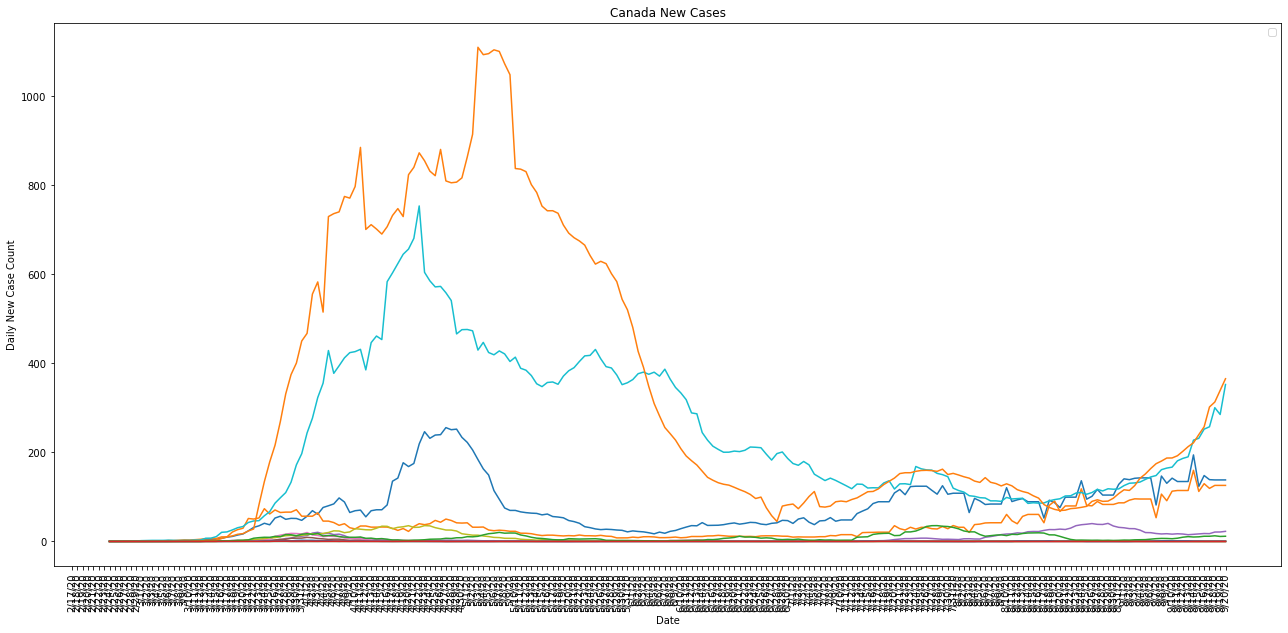

In [95]:
country = 'Canada'

plt.figure(figsize=(22, 10))

data = globalDF[globalDF['Country/Region']==country].iloc[:,30:].transpose().diff().rolling(window=7).mean()

# plt.plot(deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,20:].transpose().diff().rolling(window=7).mean())
plt.plot(data)


# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,5:].transpose().diff().rolling(window=7).mean())
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,5:].transpose())

# for i, lab in enumerate(labels):
#     x = dfData.iloc[i,j]
#     y = dfDiff.iloc[i,j]
#     plt.scatter(x, y, marker='o', color='red')
#     plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title(country + ' New Cases')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')
# plt.xlim(left='2/19/2020')
# plt.ylim(1, 100000)
plt.legend(loc='left')
plt.xticks(rotation='vertical')

# plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()

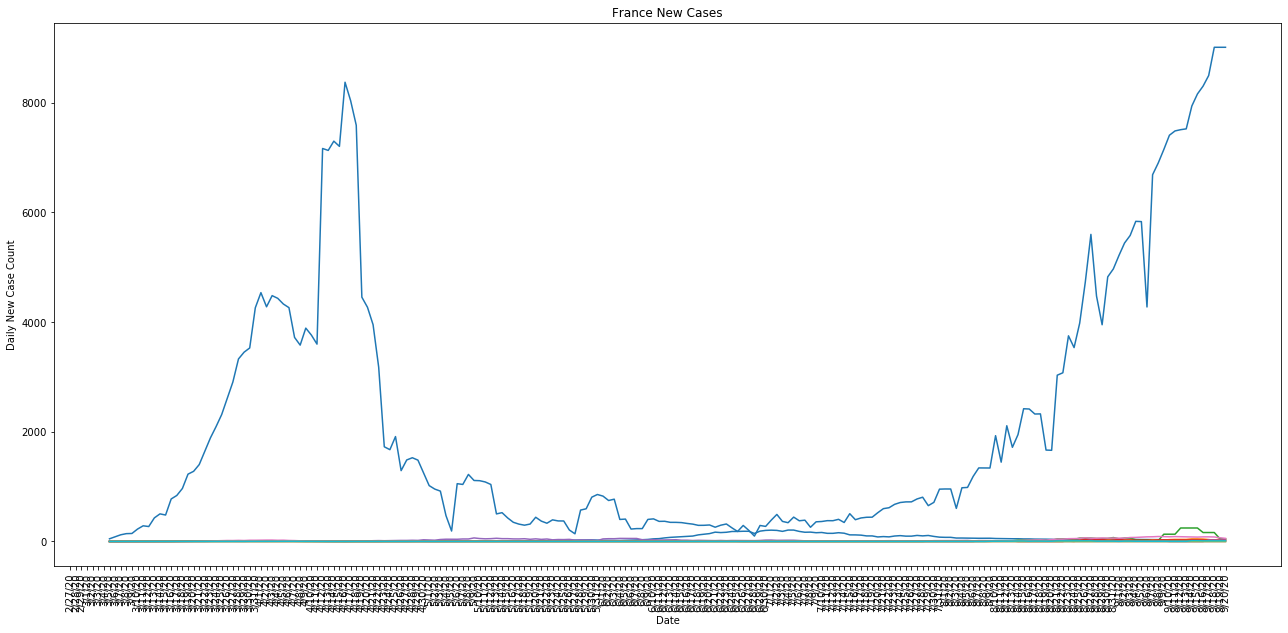

In [96]:
country = 'France'

plt.figure(figsize=(22, 10))

plt.plot(globalDF[globalDF['Country/Region']==country].iloc[:,40:].transpose().diff().rolling(window=7).mean())

labels = globalDF[globalDF['Country/Region']==country]['Province/State'].to_list()

# plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title(country + ' New Cases')

plt.xlabel('Date')
plt.ylabel('Daily New Case Count')

plt.show()



In [97]:
confDF[confDF['Country_Region'] == 'US'].groupby('Country_Region').sum().iloc[:,5:].transpose().diff()

Country_Region,US
1/22/20,NaN
1/23/20,0.0
1/24/20,1.0
1/25/20,0.0
1/26/20,3.0
...,...
9/16/20,37709.0
9/17/20,44360.0
9/18/20,49522.0
9/19/20,44186.0


In [98]:
confDF[confDF['Province_State']=='California'].sort_values(by=confDF.columns[-1], ascending=False).iloc[:20,:]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
213,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,252066,253176,253985,254656,255049,256148,257271,258516,259817,260797
228,84006065,US,USA,840,6065.0,Riverside,California,US,33.743150,-115.993358,...,55073,55073,55073,55766,55986,56201,56374,56681,56681,56681
231,84006071,US,USA,840,6071.0,San Bernardino,California,US,34.840603,-116.177469,...,50385,50543,50699,50709,50978,51252,51467,51750,52287,52471
224,84006059,US,USA,840,6059.0,Orange,California,US,33.701475,-117.764600,...,50613,50760,50930,50974,51124,51259,51399,51646,51873,52063
232,84006073,US,USA,840,6073.0,San Diego,California,US,33.034846,-116.736533,...,41969,42414,42679,42887,43181,43445,43619,44007,44293,44577
209,84006029,US,USA,840,6029.0,Kern,California,US,35.343294,-118.727780,...,30440,30563,30622,30735,30850,30916,31076,31148,31261,31379
204,84006019,US,USA,840,6019.0,Fresno,California,US,36.757339,-119.646695,...,26783,26917,27076,27196,27232,27312,27381,27487,27560,27668
229,84006067,US,USA,840,6067.0,Sacramento,California,US,38.451068,-121.342537,...,19669,20063,20184,20435,20545,20660,20961,21171,21171,21297
195,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,...,19819,19837,19991,20022,20097,20097,20162,20364,20494,20558
238,84006085,US,USA,840,6085.0,Santa Clara,California,US,37.231049,-121.697046,...,19143,19417,19549,19613,19683,19760,19891,20129,20252,20410


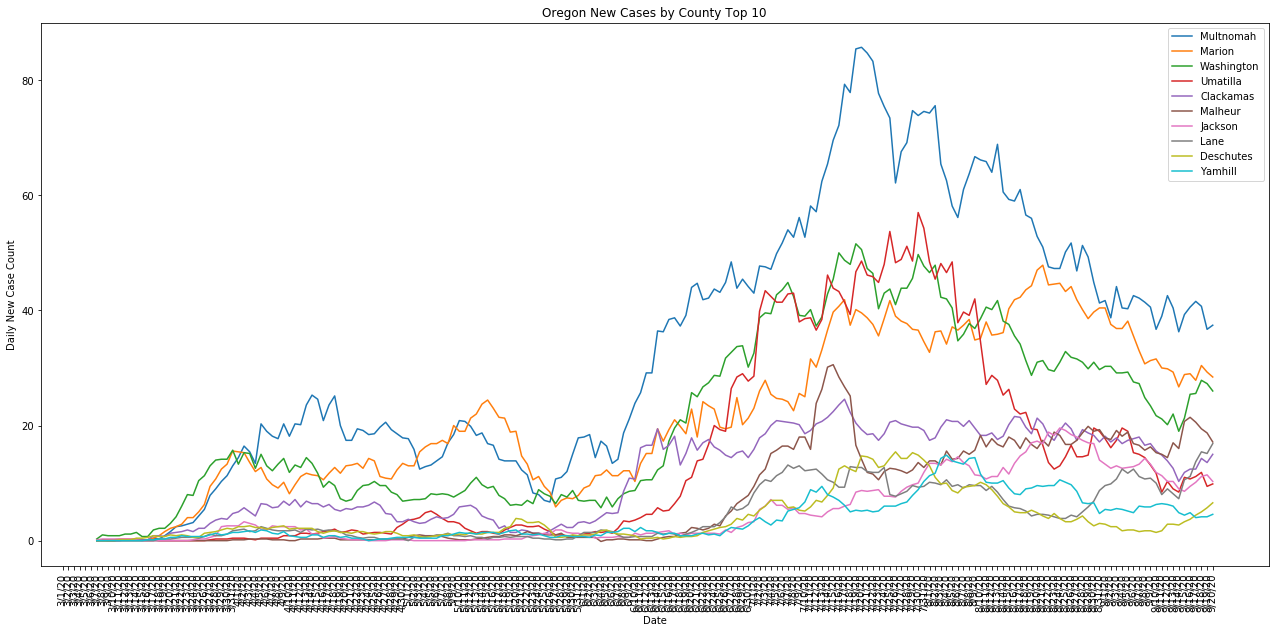

In [99]:
state = 'Oregon'

counties = confDF[confDF['Province_State']==state].sort_values(by=confDF.columns[-1], ascending=False).Admin2.tolist()
dates = confDF[confDF['Province_State']==state].sort_values(by=confDF.columns[-1], ascending=False).iloc[:,20:].columns.tolist()


data = pd.DataFrame(np.array(confDF[confDF['Province_State']==state].sort_values(by=confDF.columns[-1], ascending=False).iloc[:,20:]), index=counties, columns=dates).transpose()
labels = data.columns


plt.figure(figsize=(22, 10))
plt.plot(data.diff().iloc[30:,:10].rolling(window=7).mean())
# plt.plot(data.diff().iloc[30:,:10])

plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title(state + ' New Cases by County Top 10')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')

plt.show()



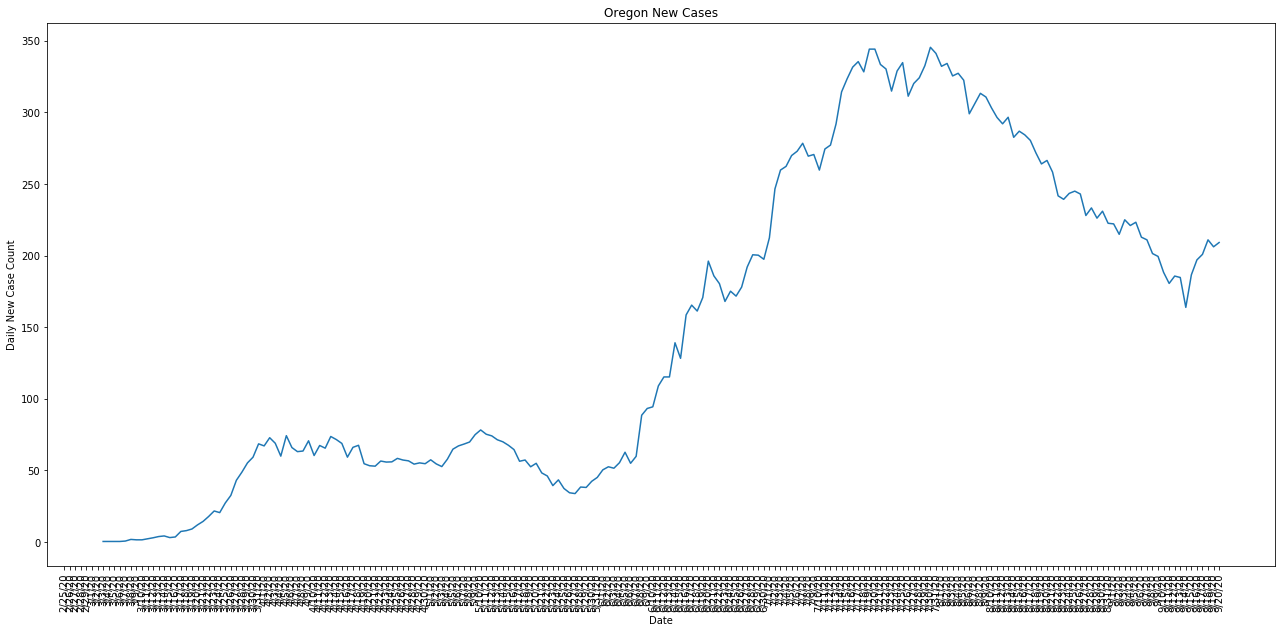

In [100]:
state = 'Oregon'

data = byStateDF[byStateDF.index==state].iloc[:,39:].transpose().diff().rolling(window=7).mean()


labels = data.columns


plt.figure(figsize=(22, 10))
plt.plot(data)
# plt.plot(data.diff().iloc[30:,:10])

# plt.plot(data.diff().iloc[30:,:10])
# plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title(state + ' New Cases')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')
# plt.yscale('log')


plt.show()

In [101]:
byStateDF.transpose()

Province_State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
UID,5.796241e+09,2.604232e+09,1.428230e+09,6.468551e+09,5.040521e+09,5.544686e+09,8.402421e+08,4.202000e+08,2.521810e+08,5.796979e+09,...,5.715211e+09,8.152644e+09,2.151643e+10,3.110012e+09,1.344870e+09,1.134699e+10,3.446239e+09,4.791143e+09,6.220135e+09,2.101459e+09
code3,5.796000e+04,2.604000e+04,1.428000e+04,6.468000e+04,5.040000e+04,5.544000e+04,8.400000e+03,4.200000e+03,2.520000e+03,5.796000e+04,...,5.712000e+04,8.148000e+04,2.150400e+05,3.108000e+04,1.344000e+04,1.134000e+05,3.444000e+04,4.788000e+04,6.216000e+04,2.100000e+04
FIPS,2.414910e+05,2.323440e+05,2.302160e+05,5.506350e+05,5.213760e+05,6.859990e+05,2.420820e+05,2.000290e+05,1.810230e+05,9.785740e+05,...,3.210577e+06,4.644119e+06,1.242661e+07,1.591939e+06,8.702960e+05,6.988213e+06,2.238627e+06,3.143133e+06,4.135229e+06,1.458641e+06
Lat,2.203247e+03,1.747178e+03,5.051386e+02,2.618392e+03,2.194950e+03,2.491870e+03,3.329094e+02,1.173278e+02,3.890418e+01,1.939031e+03,...,2.921998e+03,3.409085e+03,8.041803e+03,1.388551e+03,6.182329e+02,4.996298e+03,1.842118e+03,2.134784e+03,3.196450e+03,9.909984e+02
Long_,-5.809578e+03,-4.293070e+03,-1.671948e+03,-6.932548e+03,-7.002258e+03,-6.751119e+03,-5.812546e+02,-2.265997e+02,-7.701656e+01,-5.540950e+03,...,-6.554502e+03,-8.180329e+03,-2.505788e+04,-3.904520e+03,-1.017581e+03,-1.044232e+04,-4.708050e+03,-4.433960e+03,-6.465455e+03,-2.464525e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/16/20,1.410870e+05,6.432000e+03,2.099070e+05,7.221900e+04,7.713210e+05,6.266600e+04,5.516600e+04,1.923400e+04,1.474300e+04,6.712010e+05,...,1.729100e+04,1.770870e+05,6.968070e+05,5.974700e+04,1.702000e+03,1.362690e+05,8.081200e+04,1.320200e+04,9.215900e+04,4.566000e+03
9/17/20,1.417570e+05,6.537000e+03,2.116600e+05,7.321100e+04,7.750370e+05,6.312500e+04,5.538600e+04,1.931800e+04,1.479000e+04,6.744560e+05,...,1.768600e+04,1.781400e+05,7.013500e+05,6.065800e+04,1.705000e+03,1.373670e+05,8.119800e+04,1.343400e+04,9.381900e+04,4.652000e+03
9/18/20,1.428630e+05,6.644000e+03,2.129420e+05,7.408200e+04,7.794910e+05,6.373000e+04,5.552700e+04,1.936600e+04,1.485200e+04,6.776600e+05,...,1.807500e+04,1.804970e+05,7.045630e+05,6.177500e+04,1.706000e+03,1.386050e+05,8.160200e+04,1.368500e+04,9.727900e+04,4.747000e+03
9/19/20,1.441640e+05,6.729000e+03,2.135510e+05,7.516000e+04,7.833130e+05,6.433600e+04,5.552700e+04,1.944900e+04,1.490200e+04,6.812330e+05,...,1.844400e+04,1.814390e+05,7.079400e+05,6.285200e+04,1.710000e+03,1.395460e+05,8.219900e+04,1.388900e+04,9.956200e+04,4.781000e+03


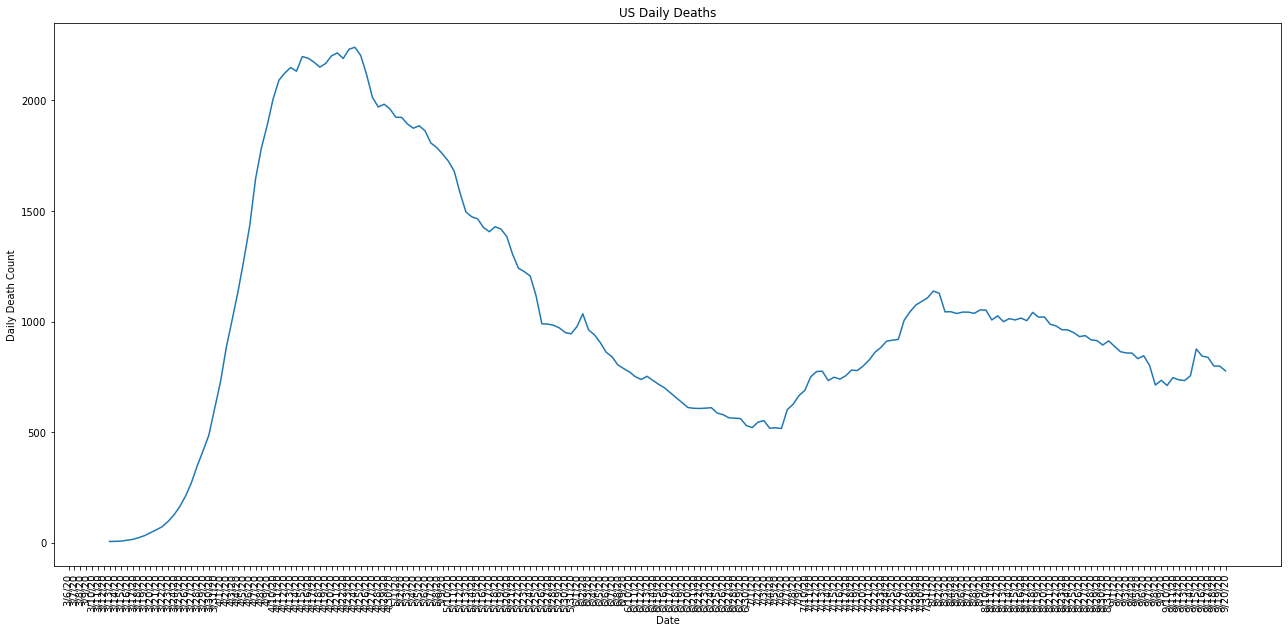

In [102]:
data = deathDF.groupby('Country_Region').sum().iloc[:,50:].transpose().diff().rolling(window=7).mean()



plt.figure(figsize=(22, 10))
plt.plot(data)
# plt.plot(data.diff().iloc[30:,:10])

# plt.plot(data.diff().iloc[30:,:10])
# plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title('US Daily Deaths')
plt.xlabel('Date')
plt.ylabel('Daily Death Count')
# plt.yscale('log')


plt.show()

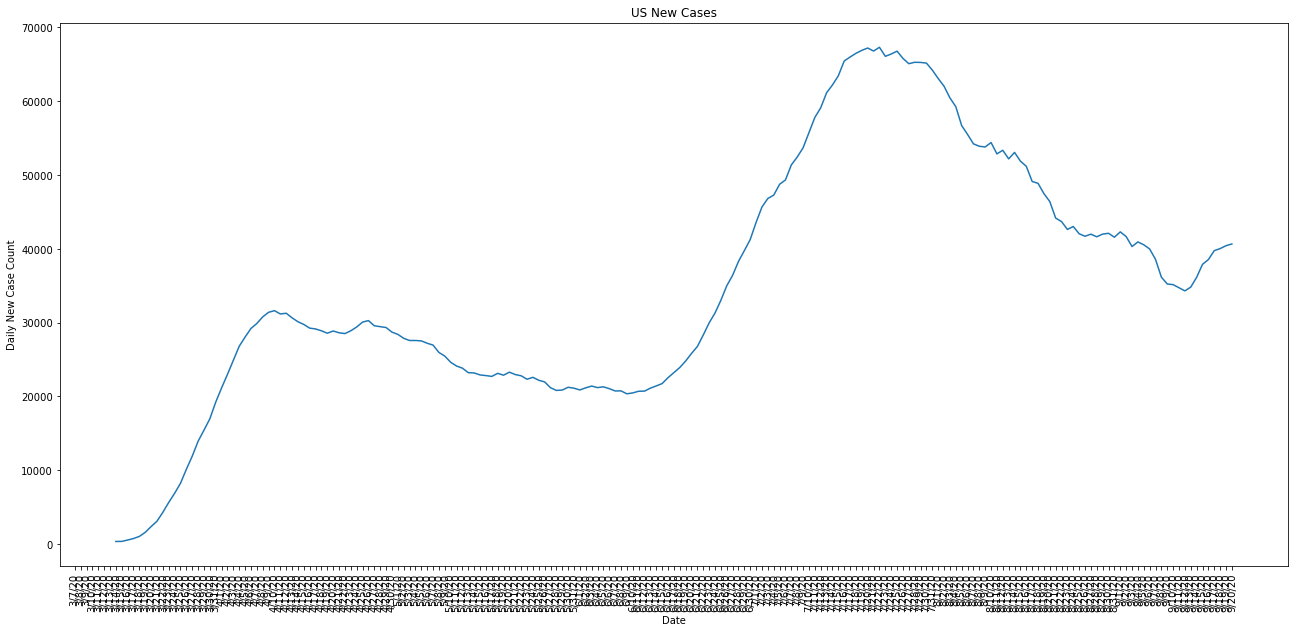

In [103]:
data = confDF.groupby('Country_Region').sum().transpose().iloc[50:,:].diff().rolling(window=7).mean()


plt.figure(figsize=(22, 10))
plt.plot(data)
# plt.plot(data.diff().iloc[30:,:10])

# plt.plot(data.diff().iloc[30:,:10])
# plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title('US New Cases')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')
# plt.yscale('log')


plt.show()

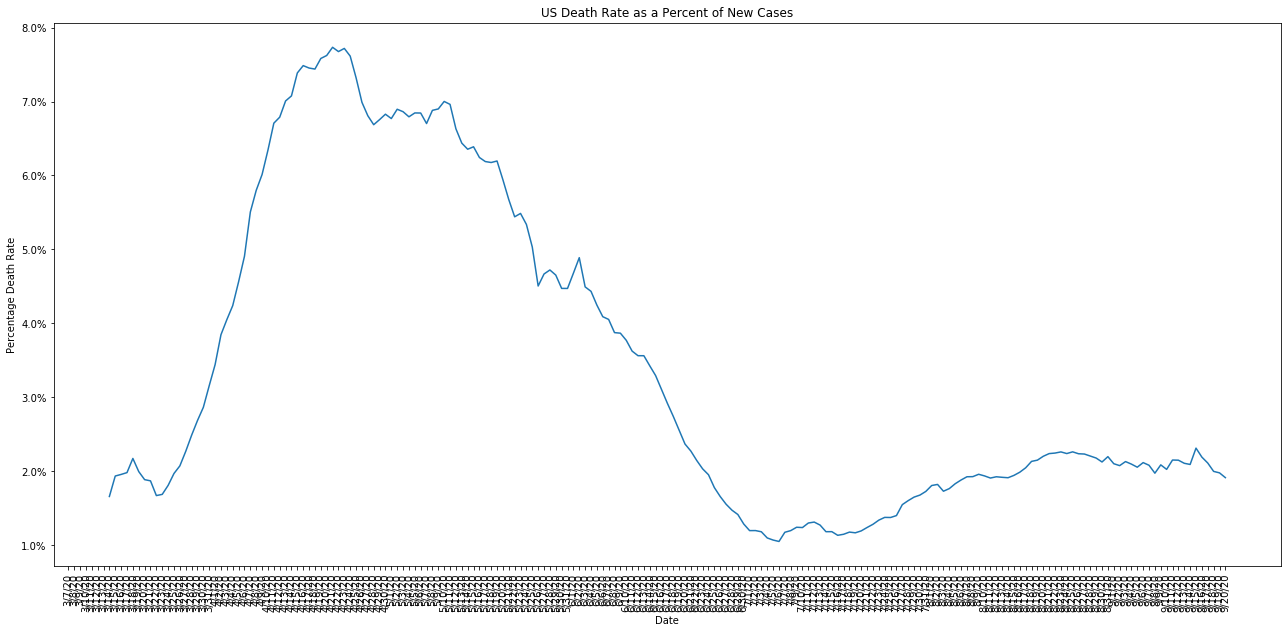

In [104]:
import matplotlib.ticker as mtick


data1 = deathDF.groupby('Country_Region').sum().iloc[:,51:].transpose().diff().rolling(window=7).mean()

data2 = confDF.groupby('Country_Region').sum().transpose().iloc[50:,:].diff().rolling(window=7).mean()

data = data1 / data2


plt.figure(figsize=(22, 10))
plt.plot(data)
# plt.plot(data.diff().iloc[30:,:10])

# plt.plot(data.diff().iloc[30:,:10])
# plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))


plt.title('US Death Rate as a Percent of New Cases')
plt.xlabel('Date')
plt.ylabel('Percentage Death Rate')
# plt.yscale('log')

plt.show()

In [105]:
state = 'Georgia'

counties = confDF[confDF['Province_State'] == state].Admin2

tempDF = confDF[confDF['Province_State'] == state].iloc[:,20:].transpose().diff().rename(columns=counties).rolling(window=7).mean().transpose()

tempDF.sort_values(by=confDF.columns[-1], ascending=False).iloc[:20,-10:]

,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
Gwinnett,105.857143,101.000000,99.857143,105.142857,114.857143,108.142857,112.142857,113.142857,117.714286,116.000000
Fulton,83.285714,81.142857,84.857143,86.857143,86.285714,93.714286,98.000000,108.000000,114.571429,109.571429
Cobb,110.857143,119.714286,108.714286,108.285714,107.285714,102.000000,97.714286,98.000000,81.000000,78.000000
DeKalb,68.571429,67.571429,63.857143,72.857143,75.571429,77.142857,76.428571,75.285714,75.571429,76.571429
Out of GA,33.142857,36.142857,15.285714,9.857143,-4.000000,4.285714,21.285714,20.714286,53.714286,65.714286
Hall,40.428571,31.857143,31.285714,32.857143,38.142857,49.142857,45.857143,46.857143,59.428571,60.428571
Clarke,129.142857,106.142857,107.571429,107.428571,92.142857,87.142857,81.428571,72.428571,60.714286,53.000000
Chatham,59.285714,53.285714,58.000000,59.714286,50.428571,47.142857,48.571429,44.714286,49.428571,45.714286
Richmond,32.428571,39.000000,46.428571,52.285714,43.285714,43.000000,45.142857,51.714286,46.857143,42.428571
Floyd,27.142857,27.285714,27.714286,29.000000,33.142857,35.000000,35.428571,38.000000,41.142857,40.000000


In [131]:
confDF.iloc[:,20:].transpose().diff().transpose()

,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,...,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,12.0,10.0,5.0,16.0,156.0,5.0,40.0,9.0,17.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,30.0,29.0,19.0,12.0,191.0,18.0,12.0,14.0,14.0
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,4.0,3.0,180.0,0.0,15.0,6.0,5.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.0,2.0,3.0,-1.0,32.0,5.0,2.0,9.0,4.0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,5.0,7.0,7.0,11.0,348.0,17.0,23.0,15.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,3.0,5.0,6.0,2.0,3.0,6.0,3.0,3.0,5.0
3336,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,11.0,4.0,0.0,3.0,4.0
3337,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,1.0,0.0,0.0
3338,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [133]:
population

Combined_Key
Autauga, Alabama, US        55869.0
Baldwin, Alabama, US       223234.0
Barbour, Alabama, US        24686.0
Bibb, Alabama, US           22394.0
Blount, Alabama, US         57826.0
                             ...   
Teton, Wyoming, US          23464.0
Uinta, Wyoming, US          20226.0
Unassigned, Wyoming, US         NaN
Washakie, Wyoming, US        7805.0
Weston, Wyoming, US          6927.0
Name: POP, Length: 3340, dtype: float64

In [143]:
confDF.iloc[:,20:].diff(axis=1).div(population.tolist(), axis=0)

,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,...,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000125,0.000215,0.000179,0.000089,0.000286,0.002792,0.000089,0.000716,0.000161,0.000304
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000197,0.000134,0.000130,0.000085,0.000054,0.000856,0.000081,0.000054,0.000063,0.000063
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000081,0.000081,0.000162,0.000122,0.007292,0.000000,0.000608,0.000243,0.000203
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000357,0.000089,0.000089,0.000134,-0.000045,0.001429,0.000223,0.000089,0.000402,0.000179
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000173,0.000086,0.000121,0.000121,0.000190,0.006018,0.000294,0.000398,0.000259,0.000156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000384,0.000128,0.000213,0.000256,0.000085,0.000128,0.000256,0.000128,0.000128,0.000213
3336,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000049,0.000049,0.000000,0.000544,0.000198,0.000000,0.000148,0.000198
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000128,0.000128,0.000000,0.000000


In [155]:
confByPopDF = pd.concat([confDF.iloc[:,:11], confDF.iloc[:,20:].diff(axis=1).rolling(window=7, axis=1).mean().div(population.tolist(), axis=0)], axis=1)

In [164]:
confByPopDF[confByPopDF['Province_State'] == 'Oregon'].sort_values(by=confByPopDF.columns[-1], ascending=False).iloc[:30,:]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
2313,84041045,US,USA,840,41045.0,Malheur,Oregon,US,43.193703,-117.622739,...,0.000491,0.000472,0.000556,0.000523,0.000678,0.000701,0.000673,0.000636,0.000612,0.000561
2301,84041021,US,USA,840,41021.0,Gilliam,Oregon,US,45.371601,-120.204887,...,0.000000,0.000000,0.000075,0.000075,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224
2315,84041049,US,USA,840,41049.0,Morrow,Oregon,US,45.418466,-119.584546,...,0.000148,0.000197,0.000197,0.000197,0.000209,0.000185,0.000172,0.000234,0.000185,0.000209
2306,84041031,US,USA,840,41031.0,Jefferson,Oregon,US,44.628068,-121.178320,...,0.000081,0.000093,0.000093,0.000075,0.000087,0.000110,0.000139,0.000133,0.000145,0.000151
2321,84041059,US,USA,840,41059.0,Umatilla,Oregon,US,45.590731,-118.735383,...,0.000108,0.000132,0.000115,0.000108,0.000141,0.000137,0.000143,0.000152,0.000121,0.000126
2324,84041063,US,USA,840,41063.0,Wallowa,Oregon,US,45.578941,-117.183538,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000119,0.000099,0.000099,0.000099,0.000099
2314,84041047,US,USA,840,41047.0,Marion,Oregon,US,44.902879,-122.581512,...,0.000086,0.000086,0.000084,0.000077,0.000083,0.000083,0.000080,0.000087,0.000084,0.000082
2308,84041035,US,USA,840,41035.0,Klamath,Oregon,US,42.687630,-121.649646,...,0.000010,0.000013,0.000013,0.000013,0.000021,0.000048,0.000059,0.000061,0.000063,0.000065
2292,84041003,US,USA,840,41003.0,Benton,Oregon,US,44.491673,-123.431699,...,0.000029,0.000031,0.000028,0.000026,0.000025,0.000021,0.000020,0.000017,0.000055,0.000063
2294,84041007,US,USA,840,41007.0,Clatsop,Oregon,US,45.997129,-123.660711,...,0.000011,0.000018,0.000018,0.000018,0.000021,0.000028,0.000021,0.000032,0.000039,0.000053


In [165]:
confByPopDF.sort_values(by=confByPopDF.columns[-1], ascending=False).iloc[:30,:]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/11/20,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20
2229,84040035,US,USA,840,40035.0,Craig,Oklahoma,US,36.762681,-95.209166,...,0.000313,0.000333,0.000303,0.002121,0.002253,0.002192,0.002182,0.002202,0.002101,0.003051
2290,84040153,US,USA,840,40153.0,Woodward,Oklahoma,US,36.423163,-99.262830,...,0.000205,0.000290,0.000254,0.000254,0.000205,0.000226,0.000269,0.000304,0.001131,0.002983
2080,84038029,US,USA,840,38029.0,Emmons,North Dakota,US,46.283984,-100.238977,...,0.000353,0.000353,0.000793,0.000837,0.000926,0.001234,0.002028,0.002160,0.002997,0.002909
1702,84030087,US,USA,840,30087.0,Rosebud,Montana,US,46.233972,-106.729288,...,0.001055,0.001423,0.001263,0.001263,0.001535,0.002190,0.002334,0.002542,0.002094,0.002398
591,84016025,US,USA,840,16025.0,Camas,Idaho,US,43.466657,-114.806589,...,0.000000,0.000129,0.000129,0.000129,0.000387,0.001550,0.001679,0.001937,0.001937,0.001937
40,84001081,US,USA,840,1081.0,Lee,Alabama,US,32.601549,-85.351322,...,0.000146,0.000110,0.000109,0.000096,0.000082,0.001751,0.001756,0.001752,0.001834,0.001823
19,84001039,US,USA,840,1039.0,Covington,Alabama,US,31.247785,-86.450509,...,0.000127,0.000089,0.000104,0.000108,0.000116,0.001739,0.001704,0.001797,0.001789,0.001801
157,84005079,US,USA,840,5079.0,Lincoln,Arkansas,US,33.953172,-91.740028,...,0.000406,0.000230,0.000230,0.000252,0.000274,0.000384,0.000384,0.001229,0.001558,0.001645
2594,84046123,US,USA,840,46123.0,Tripp,South Dakota,US,43.344594,-99.885489,...,0.000158,0.000315,0.000368,0.000341,0.000473,0.000499,0.000866,0.001076,0.001339,0.001497
2745,84048095,US,USA,840,48095.0,Concho,Texas,US,31.326359,-99.864730,...,0.000210,0.000210,0.000210,0.000210,0.000419,0.000314,0.000314,0.000210,0.001415,0.001415


In [166]:
population

Combined_Key
Autauga, Alabama, US        55869.0
Baldwin, Alabama, US       223234.0
Barbour, Alabama, US        24686.0
Bibb, Alabama, US           22394.0
Blount, Alabama, US         57826.0
                             ...   
Teton, Wyoming, US          23464.0
Uinta, Wyoming, US          20226.0
Unassigned, Wyoming, US         NaN
Washakie, Wyoming, US        7805.0
Weston, Wyoming, US          6927.0
Name: POP, Length: 3340, dtype: float64